## Financial Planning

In [45]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [46]:
# Load .env enviroment variables
load_dotenv()

True

In [41]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

### Personal Finance Planner

#### Collect Crypto Prices Using the requests Library

In [32]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [14]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()
# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()

In [15]:
# Compute current value of my BTC
my_btc_value = response_btc_data['data']['1']['quotes']['USD']['price']
my_btc_value

45721.0

In [16]:
# Compute current value of my ETH
my_eth_value = response_eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value

3509.35

In [17]:
#Make it look nice by Printing
print(f"The current value of my {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of my 1.2 BTC is $45721.00
The current value of my 5.3 ETH is $3509.35


### Collect Investments Data Using Alpaca: SPY(Stocks) and AGG(bonds)

In [18]:
#Current Shares
my_agg = 200
my_spy = 50

In [47]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("API_KEY")
alpaca_secret_key = os.getenv("SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [52]:
# Format current date as ISO format
today = pd.Timestamp("2021-5-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [53]:
df_portfolio.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69027661

In [56]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of my {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of my {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of my 50 SPY shares is $20826.50
The current value of my 200 AGG shares is $22856.00


### Saving Health Analysis

In [54]:
#Monthly Household income 
monthly_income = 12000

In [65]:
#Create Savings Dataframe

my_crypto = my_btc_value + my_eth_value
my_shares = my_spy_value + my_agg_value

value_data = {
    "Amount in USD": {
       "Cryptocurrency": my_crypto,
       "Shares & Bonds": my_shares
    }
}

df_savings = pd.DataFrame(value_data)
df_savings
# Display savings DataFrame
display(df_savings)

,Amount in USD
Cryptocurrency,49230.35
Shares & Bonds,43682.50


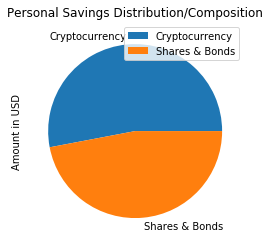

In [66]:
#Savings Pie Chart

df_savings.plot.pie(y="Amount in USD", title= "Personal Savings Distribution/Composition")

In [68]:
# Set ideal emergency fund
rainy_day_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = my_crypto + my_shares

# Validate saving health
if (my_savings > rainy_day_fund):
    print("You are flush with cash! You have enough money for not only a rainy day, but a flood!")
elif (my_savings == rainy_day_fund):
    print("You have reached your goal for saving for a rainy day! Now save more!")
else:
    diff = rainy_day_fund - my_savings
    print(f"You are ${diff} away from reaching your goal of even having an umbrella, try to hold off on the avocado toast.")

You are flush with cash! You have enough money for not only a rainy day, but a flood!


### Part 2-Retirement Planning

#### Monte Carlo Simulation

In [72]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-14', tz='America/New_York').isoformat()

In [73]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
2020-12-21 00:00:00-05:00  117.92  117.960  117.750  117.79  3645094  364.97   
2020-12-22 00:00:00-05:00  117.88  117.980  117.825  117.96  2570686  368.21   
2020-12-23 00:00:00-05:00  117.81  117.870  117.630  117.87  3972279  368.28   
2020-12-24 00:00:00-05:00  117.94  118.046  117.925  118.01  1722930  368.08   
2020-12-28 00:00:00-05:00  117.97  118.045  117.833  118.01  3503095  371.74   

                                                                   
                               high       low     close    volume  
2020-12-21 00:00:00-05:00  378.4600  362.0300  367.9300  73946581  
2020-12-22 00:00:00-05:00  368.3317  366.0300  367.2200  41116443  
2020-12-23 00:00:00-05:00  369.6200  367.2172  367.5300  37537811  
2020-12-24 00:00:00-05:00  369.0100  367.4500  368.9899  21047937  
2020-12-28 00:00:00-05:00  372.5900  371.0700  372.1400  31589494

In [74]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Print the simulation input data
MC_dist.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
2020-12-21 00:00:00-05:00  117.92  117.960  117.750  117.79  3645094   
2020-12-22 00:00:00-05:00  117.88  117.980  117.825  117.96  2570686   
2020-12-23 00:00:00-05:00  117.81  117.870  117.630  117.87  3972279   
2020-12-24 00:00:00-05:00  117.94  118.046  117.925  118.01  1722930   
2020-12-28 00:00:00-05:00  117.97  118.045  117.833  118.01  3503095   

                                           SPY                                \
                          daily_return    open      high       low     close   
2020-12-21 00:00:00-05:00          NaN  364.97  378.4600  362.0300  367.9300   
2020-12-22 00:00:00-05:00     0.001443  368.21  368.3317  366.0300  367.2200   
2020-12-23 00:00:00-05:00    -0.000763  368.28  369.6200  367.2172  367.5300   
2020-12-24 00:00:00-05:00     0.001188  368.08  369.0100  367.4500  368.9899   
2020-12-28 00:00:00-05:00     0.000000  371.74  372.5900  371.0700  372.1400   

                                                  
                             volume daily_return  
2020-12-21 00:00:00-05:00  73946581          NaN  
2020-12-22 00:00:00-05:00  41116443    -0.001930  
2020-12-23 00:00:00-05:00  37537811     0.000844  
2020-12-24 00:00:00-05:00  21047937     0.003972  
2020-12-28 00:00:00-05:00  31589494     0.008537

In [75]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004545,0.990102,0.995114,1.004809,0.998377,1.001852,1.010650,1.001086,1.005462,1.005983,...,0.995802,1.001421,1.001455,0.987650,1.001386,0.996333,1.011356,1.003393,1.003488,0.998487
2,1.003178,0.996281,0.990800,1.002250,0.999220,1.008184,1.014501,1.004990,1.019099,1.005693,...,1.002517,1.000556,1.001957,0.993943,1.005150,0.991139,1.009559,0.998845,1.002527,1.000197
3,1.010161,0.997856,0.993700,0.992487,0.999818,1.003288,1.011177,1.006138,1.021196,1.005122,...,1.003185,0.997472,1.005766,0.996467,1.007404,0.984531,1.013264,1.000112,1.003478,0.997524
4,1.010157,0.992820,1.002420,0.998811,0.993724,1.003369,1.014975,1.003534,1.020587,1.000709,...,1.008367,0.987808,1.005153,0.994674,1.010142,0.983157,1.020570,0.993812,0.996959,0.999224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,191.439152,95.169583,481.441440,112.150003,260.825579,145.868844,223.784137,61.306425,47.319828,109.075155,...,142.841872,136.251654,101.262134,61.341113,102.113673,125.278791,116.211196,139.679575,137.960826,106.161038
7557,193.060400,95.349931,484.147278,111.378320,261.416243,146.226438,225.450131,61.558539,47.350938,109.341933,...,142.384403,136.558437,101.666216,61.071583,102.324726,125.753380,115.715823,140.048290,138.130378,105.716986
7558,192.449366,95.599390,488.232852,110.973333,260.310189,146.695149,226.013342,61.532947,47.406450,110.036791,...,143.578952,137.201291,101.282266,60.878699,102.062477,125.620189,115.403526,139.298793,137.353523,105.569448
7559,193.673548,94.649893,491.196821,111.266274,261.226576,147.632268,224.507077,61.810863,47.096303,110.457886,...,142.627182,137.374956,101.083277,61.228812,102.122666,123.203205,115.177668,140.150628,136.996137,105.871225


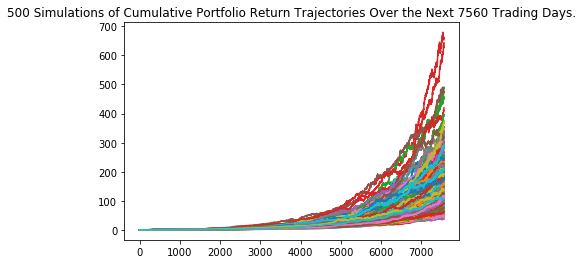

In [76]:
# Plot simulation outcomes
MC_dist.plot_simulation()

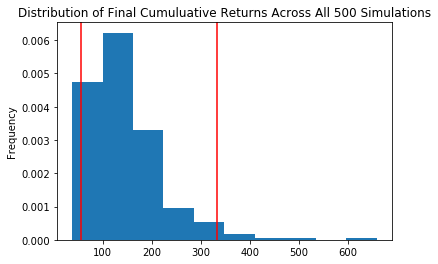

In [77]:
# Plot probability distribution and confidence intervals
MC_dist.plot_distribution()

#### Retirement Analysis

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean            144.673746
std              77.271726
min              37.602938
25%              92.391111
50%             127.647765
75%             173.560146
max             658.000082
95% CI Lower     55.728421
95% CI Upper    332.759817
Name: 7560, dtype: float64


#### Calculate expected portfolio return at the 95% Lower/Upper Confidence intervals based on a 20,000 USD initial Investment

In [80]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1114568.41 and $6655196.35


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [82]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1671852.62 and $9982794.52


### Optional- Early Retirement Pipedream

#### Five Year (Retirement) Plan

In [84]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Five_Year_Plan = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5)

In [85]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Five_Year_Plan.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003745,1.001974,1.024702,1.001530,1.002501,1.001114,0.999587,0.992175,0.997034,0.996823,...,0.992681,1.004100,0.990411,1.004039,1.006674,0.992559,1.003744,1.013036,0.996492,0.998537
2,0.997300,1.003614,1.030612,1.013897,1.009878,0.993307,1.002946,0.987658,0.989046,1.002168,...,0.989701,0.999224,0.989367,1.012734,1.015656,1.002265,0.991189,1.016509,0.983020,1.007247
3,1.005735,1.008937,1.027749,1.011548,1.012566,1.001741,1.008838,0.991661,0.975079,1.001633,...,0.984167,0.995925,0.986691,1.016119,1.015351,1.006892,0.983021,1.021743,0.974282,1.001812
4,1.010666,1.010277,1.035264,1.006583,1.009056,1.008127,1.013758,0.982576,0.968029,1.006437,...,0.973610,0.997254,0.999188,1.022728,1.025664,1.001278,0.982903,1.015233,0.986604,1.003735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.905017,2.393836,5.318513,3.308906,6.753370,3.968454,2.878089,2.941126,2.854669,2.347996,...,3.136957,6.197968,3.568570,2.512821,5.307216,3.932008,2.525382,4.300335,3.216270,3.107914
1257,2.907683,2.402242,5.322805,3.331778,6.793738,3.961278,2.880087,2.940171,2.864830,2.343739,...,3.151291,6.208954,3.614162,2.531192,5.310998,3.889680,2.483426,4.313552,3.214139,3.155881
1258,2.919099,2.426488,5.336223,3.341227,6.805830,3.884905,2.868855,2.960253,2.834018,2.339482,...,3.130995,6.284484,3.614587,2.557520,5.300984,3.925716,2.503300,4.304474,3.210886,3.162123
1259,2.929383,2.458235,5.337521,3.339062,6.847716,3.865844,2.854648,2.951079,2.820154,2.369007,...,3.151385,6.303782,3.631324,2.565724,5.304145,3.950859,2.511943,4.350285,3.251846,3.174500


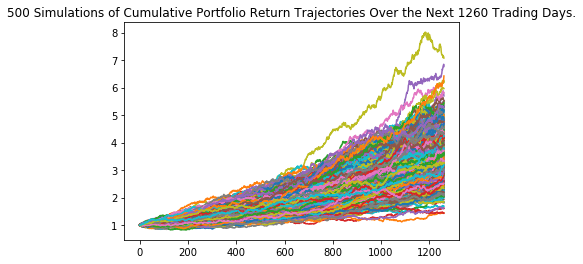

In [86]:
# Plot simulation outcomes
Five_Year_Plan.plot_simulation()

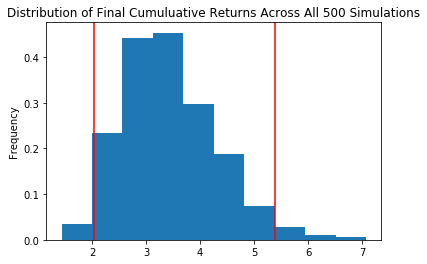

In [87]:
# Plot probability distribution and confidence intervals
Five_Year_Plan.plot_distribution()

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
FYP_summary = Five_Year_Plan.summarize_cumulative_return()

# Print summary statistics
print(FYP_summary)

count           500.000000
mean              3.437016
std               0.887359
min               1.430857
25%               2.806475
50%               3.304778
75%               3.934676
max               7.075434
95% CI Lower      2.039766
95% CI Upper      5.395152
Name: 1260, dtype: float64


In [90]:
# Set initial investment
FYP_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(FYP_summary[8]*FYP_initial_investment,2)
ci_upper_five = round(FYP_summary[9]*FYP_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${FYP_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $122385.97 and $323709.12


### Ten Year (Retirement) Plan

In [91]:
#Do the same thing but 10 years

Ten_Year_Plan = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5)

In [92]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Ten_Year_Plan.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004923,1.002159,1.005423,0.993726,1.008275,0.999511,0.998640,1.002490,1.010451,0.996608,...,1.019238,0.998887,1.003357,1.007180,0.998209,1.005501,0.998766,0.997784,1.001755,1.016584
2,1.001975,1.000870,1.011942,1.004500,1.008391,0.999228,1.003934,1.019420,1.003688,1.000755,...,1.018408,0.982715,1.002367,1.021997,0.989445,1.003212,0.995245,1.017814,0.995387,1.000965
3,1.004819,0.995934,1.009887,0.993504,1.016607,0.997715,0.999036,1.030361,1.000755,0.995289,...,1.024532,0.989800,1.000578,1.033237,0.999522,0.995501,1.013355,1.011414,0.991496,0.999029
4,1.001675,1.003329,1.013171,1.005072,1.012740,0.996182,1.000939,1.038785,1.004393,1.001647,...,1.011494,0.980051,0.999505,1.018572,0.992637,1.003828,1.016746,1.008504,1.002926,1.014635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.512232,4.721950,2.816079,4.249553,2.641969,4.625264,4.642115,3.672133,3.299325,4.029556,...,4.087383,1.755995,2.642223,2.718470,2.676186,2.024622,2.643961,5.307012,5.014442,3.571909
1257,3.504233,4.708420,2.807710,4.293347,2.624840,4.588418,4.701877,3.661465,3.286950,4.006432,...,4.062201,1.743036,2.627808,2.735647,2.690951,2.043167,2.648545,5.337222,5.021273,3.572359
1258,3.546386,4.691251,2.786034,4.361893,2.601536,4.564214,4.784300,3.647310,3.294192,3.961064,...,4.056801,1.739342,2.645722,2.772479,2.671921,2.021630,2.664729,5.347015,5.009757,3.599792
1259,3.566343,4.728964,2.799995,4.376242,2.599847,4.484414,4.743681,3.607029,3.285535,3.903816,...,4.097040,1.722874,2.638066,2.757490,2.665639,2.026784,2.669514,5.341834,5.030009,3.567226


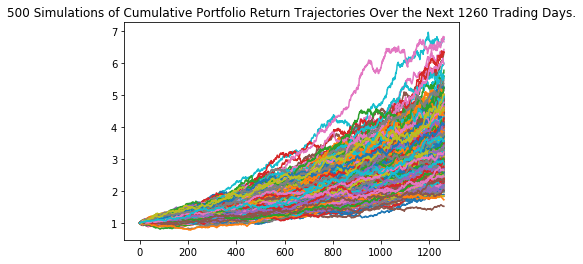

In [93]:
# Plot simulation outcomes
Ten_Year_Plan.plot_simulation()

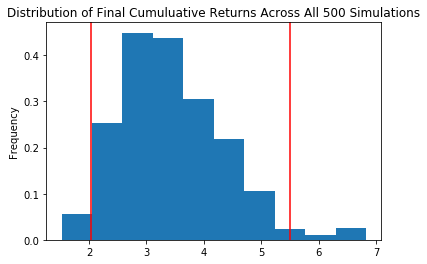

In [94]:
# Plot probability distribution and confidence intervals
Ten_Year_Plan.plot_distribution()

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
TYP_summary = Ten_Year_Plan.summarize_cumulative_return()

# Print summary statistics
print(TYP_summary)

count           500.000000
mean              3.445902
std               0.902256
min               1.523374
25%               2.827295
50%               3.305937
75%               4.006311
max               6.823181
95% CI Lower      2.032765
95% CI Upper      5.509005
Name: 1260, dtype: float64


In [96]:
# Set initial investment
TYP_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(TYP_summary[8]*TYP_initial_investment,2)
ci_upper_five = round(TYP_summary[9]*TYP_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${TYP_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $121965.89 and $330540.33


#### Don't Retire, or at least find some good hobbies if you do, gotta keep busy! 